# Classification (heart-desease)

## (1) Read

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("heart_desease_data.csv")

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

## (2) Data prepartion

### (2.1) EDA

### (2.2) Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


It's perfecto

#### (2.2.5) Selection

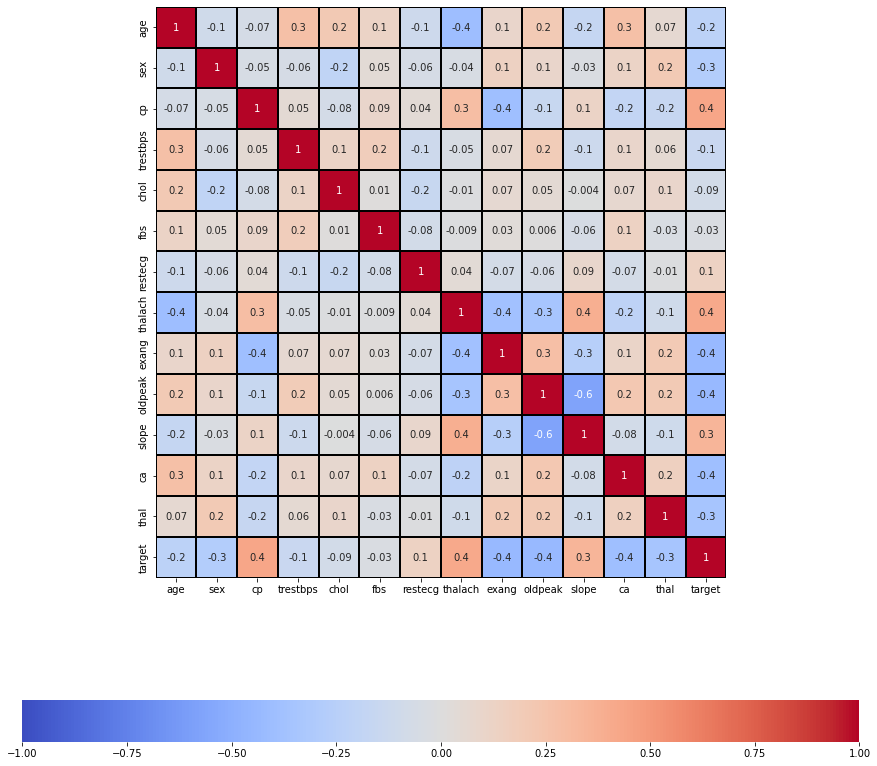

In [ ]:
list_of_cols = df.columns.to_list()

cols = list_of_cols
fig, ax = plt.subplots(figsize=(15,15))
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True, # отображаеь число
                 ax=ax,
                 fmt=".1g",
                 cmap='coolwarm',
                 vmin=-1, vmax=1, center=0,
                 linewidths=1, linecolor='black',
                 cbar_kws= {'orientation': 'horizontal'},
                 square=True)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df_three_features = df[['cp', 'thalach', 'ca', 'target']]

### (2.3) Splitting

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
X = df.drop('target', axis=1)
Y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## (3) Train (SVC)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', C=1)
svclassifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
SVC_pred = svclassifier.predict(X_test)

In [ ]:
print(SVC_pred[:10])
print(y_test[:10])

[0 0 0 1 1 0 1 1 0 1]
269    0
249    0
223    0
44     1
122    1
206    0
3      1
90     1
290    0
222    0
Name: target, dtype: int64


## (4) Analysis/Evaluation (SVC)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, SVC_pred))
print(classification_report(y_test, SVC_pred))

[[22  6]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, SVC_pred))
print(classification_report(y_test, SVC_pred))

[[22  6]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## (3) Train (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
TreeClassifier = DecisionTreeClassifier()
TreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
Tree_pred = TreeClassifier.predict(X_test)

In [ ]:
print(Tree_pred[:10])
print(y_test)

[0 1 0 1 1 0 1 1 0 1]
269    0
249    0
223    0
44     1
122    1
      ..
12     1
265    0
197    0
29     1
143    1
Name: target, Length: 61, dtype: int64


## (4) Analysis/Evaluation

In [ ]:
print(confusion_matrix(y_test, Tree_pred))
print(classification_report(y_test, Tree_pred))

[[23  5]
 [10 23]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.75        28
           1       0.82      0.70      0.75        33

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



Cтроим дерево

In [ ]:
cols = X_train.columns

# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
# в feature_names можно прямо прописать названия признаков, а можно написать X_train.columns
export_graphviz(TreeClassifier, feature_names=cols, class_names=['0', '1'], 
out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

In [ ]:
Image("small_tree.png", width=1200)